In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

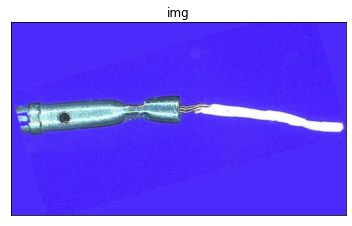

In [131]:
img = cv2.imread(
    '/Users/zhouxinyu/Code/Python/vision/images/red.jpg', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
showImages([img], ['img'], [1, 1])

In [59]:
def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题

def showImages(images, titles, size):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
#         b,g,r = cv2.split(images[i])
        plt.imshow(images[i] ,'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

In [111]:
# HSV中H的取值范围是[0, 180]，其中H=0是标准的红色
# sensitivity是围绕0的浮动，sensitivity=10时表示认定[0, 10] and [170, 180]都是红色
# 即[0, sensitivity] and [180 - sensitivity, 180]是红色范围
def binarize(hsvImage, sensitivity = 10, lower = 0, upper = 255):
    red_positive = np.array([
        [0, lower, lower],
        [sensitivity, upper, upper]
    ])
    red_reverse = np.array([
        [180 - sensitivity, lower, lower],
        [180, upper, upper]
    ])
    mask_positive = cv2.inRange(hsvImage, red_positive[0], red_positive[1])
    mask_reverse = cv2.inRange(hsvImage, red_reverse[0], red_reverse[1])
    return mask_positive, mask_reverse

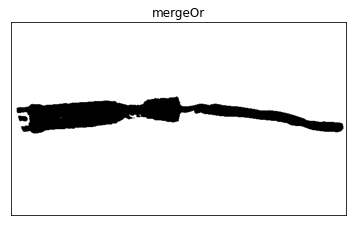

In [116]:
positive, reverse = binarize(hsv, 10, 100, 255)
mergeOr = cv2.bitwise_or(positive, reverse)
showImages([mergeOr], ['mergeOr'], [1, 1])

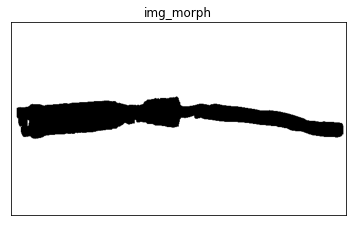

In [118]:
img_morph = mergeOr.copy()
core = (20, 20)
cv2.erode(img_morph, core, img_morph, iterations=10)
showImages([img_morph], ['img_morph'], [1, 1])

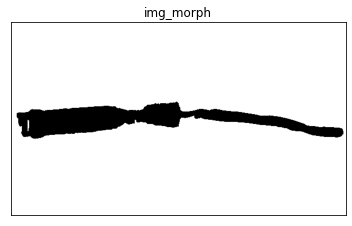

In [119]:
cv2.dilate(img_morph, core, img_morph, iterations=10)
showImages([img_morph], ['img_morph'], [1, 1])

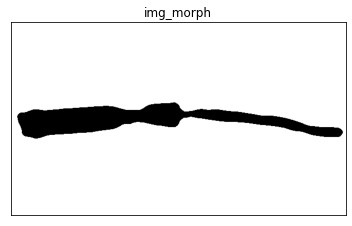

In [120]:
img_morph = cv2.medianBlur(img_morph, 15)
showImages([img_morph], ['img_morph'], [1, 1])

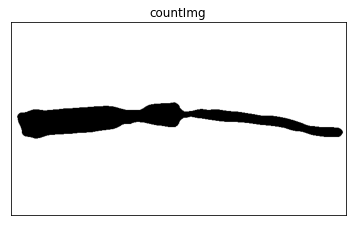

In [129]:
# res = cv2.findContours(img_morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = res[0]
cnts_sort = sorted(cnts, key=cv2.contourArea, reverse=True)
test = cv2.drawContours(img_morph, cnts_sort[0], -1, (255, 0, 0), 2)
showImages([test], ['countImg'], [1, 1])

In [132]:
test

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [81]:
mask_positive_0, mask_reverse_0 = binarize(hsv, 10, 0, 255)
mask_positive_100, mask_reverse_100 = binarize(hsv, 10, 100, 255)

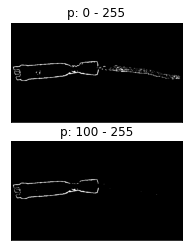

In [101]:
# H: 0 - 10
# S & V: 0 - 255
poor_0 = mask_positive_0 - mask_positive_100
images = [mask_positive_0, mask_positive_100]
titles = ['p: 0 - 255', 'p: 100 - 255']
showImages(images, titles, [2, 1])

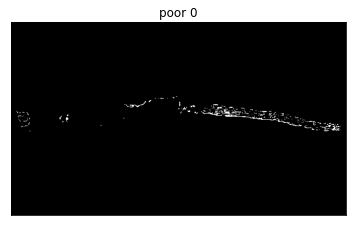

In [102]:
showImages([poor_0], ['poor 0'], [1, 1])

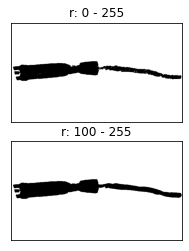

In [91]:
# H: 170 - 180
images_r = [mask_reverse_0, mask_reverse_100]
titles_r = ['r: 0 - 255', 'r: 100 - 255']
showImages(images_r, titles_r, [2, 1])

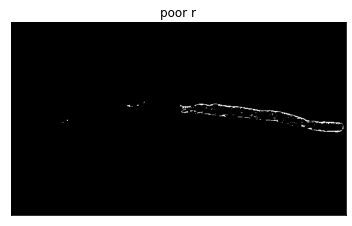

In [103]:
showImages(
    [mask_reverse_0 - mask_reverse_100], 
    ['poor r'], 
    [1, 1]
)

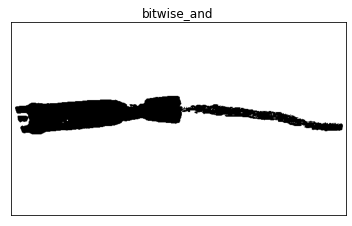

In [94]:
imgAnd = cv2.bitwise_and(mask_reverse_0, mask_reverse_0)
images_and = [imgAnd]
titles_and = ['bitwise_and']
showImages(images_and, titles_and, [1, 1])

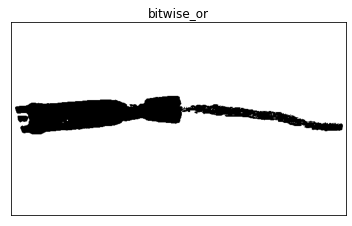

In [95]:
imgOr = cv2.bitwise_or(mask_reverse_0, mask_reverse_0)
images_or = [imgOr]
titles_or = ['bitwise_or']
showImages(images_or, titles_or, [1, 1])

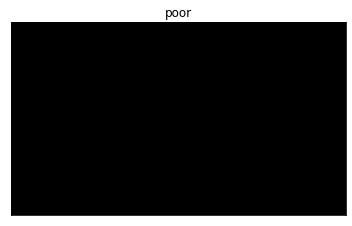

In [97]:
poor = imgAnd - imgOr
images_poor = [poor]
titles_poor = ['poor']
showImages(images_poor, titles_poor, [1, 1])

In [107]:
f_arr = np.array([0, 0, 255, 255])
s_arr = np.array([0, 255, 0, 255])
test_and = cv2.bitwise_and(f_arr, s_arr)
test_or = cv2.bitwise_or(f_arr, s_arr)
print(test_and)
print(test_or)

[[  0]
 [  0]
 [  0]
 [255]]
[[  0]
 [255]
 [255]
 [255]]


In [41]:
cv_show(mask_positive)

In [44]:
cv_show(mask_reverse)

In [24]:
a = np.array([[3,1],[1,2]])
print('a -> ',a)
# a
one = np.ones([10,10]) 
print('one -> ', one)

a ->  [[3 1]
 [1 2]]
one ->  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [6]:
arr_a = [1,2,3]
arr_a

[1, 2, 3]